**OPEN FILE**

In [ ]:
import pandas as pd
from scipy.stats import zscore

# Load the dataset from the provided file path
file_path = "/content/reviews - reviews.csv"
df = pd.read_csv(file_path)

In [ ]:
df.shape

(19200, 13)

In [ ]:
df.dtypes

reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
appVersion              object
sortOrder               object
appId                   object
dtype: object

In [ ]:
df.isnull().any()

reviewId                False
userName                False
userImage               False
content                 False
score                   False
thumbsUpCount           False
reviewCreatedVersion     True
at                      False
replyContent             True
repliedAt                True
appVersion               True
sortOrder               False
appId                   False
dtype: bool

**DESCRIPTIVE ANALYSIS**

In [ ]:
import pandas as pd

mean_score = df['score'].mean()
median_score = df['score'].median()

print(f"Mean Value of Score: {mean_score}")
print(f"Median Value of Score: {median_score}")

Mean Value of Score: 3.0
Median Value of Score: 3.0


In [ ]:
mean_thumbs_up = df['thumbsUpCount'].mean()
median_thumbs_up = df['thumbsUpCount'].median()

print(f"Mean Value of Thumbs Up Count: {mean_thumbs_up}")
print(f"Median Value of Thumbs Up Count: {median_thumbs_up}")

Mean Value of Thumbs Up Count: 355.8346875
Median Value of Thumbs Up Count: 0.0


**DATA VISUALIZATION**

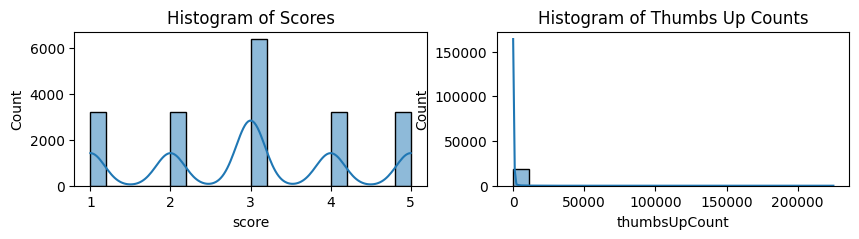

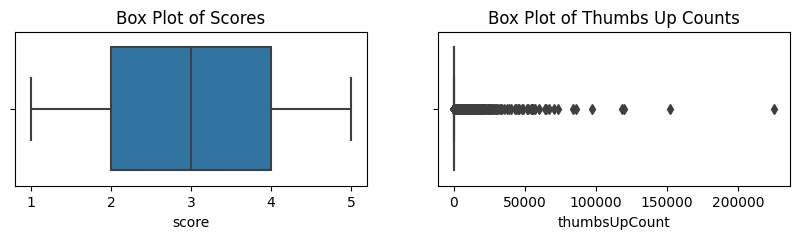

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(10, 2))

# Histograms
plt.subplot(1, 2, 1)
sns.histplot(df['score'], bins=20, kde=True)
plt.title('Histogram of Scores')

plt.subplot(1, 2, 2)
sns.histplot(df['thumbsUpCount'], bins=20, kde=True)
plt.title('Histogram of Thumbs Up Counts')

# Show the plots
plt.show()

# Box Plots
plt.figure(figsize=(10, 2))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['score'])
plt.title('Box Plot of Scores')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['thumbsUpCount'])
plt.title('Box Plot of Thumbs Up Counts')

# Show the plots
plt.show()

<ipython-input-13-c483493c91d1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

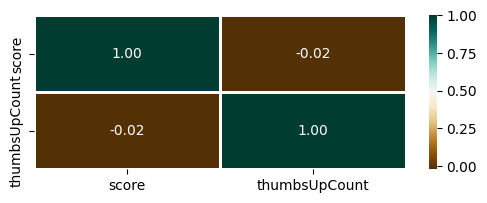

In [ ]:
plt.figure(figsize=(6,2))

sns.heatmap(df.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)


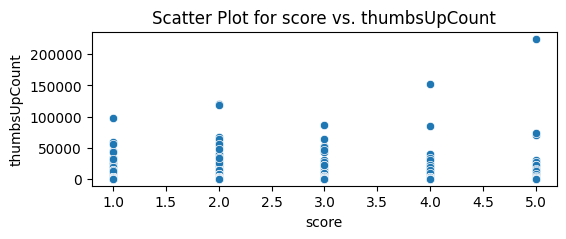

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with numerical columns
numerical_columns = ['score', 'thumbsUpCount']

# Scatter plot for 'score' and 'thumbsUpCount'
plt.figure(figsize=(6,2))
sns.scatterplot(x='score', y='thumbsUpCount', data=df)
plt.title('Scatter Plot for score vs. thumbsUpCount')
plt.show()


In [ ]:
unique_app_ids = df['appId'].unique()
print(unique_app_ids)

['in.startv.hotstar' 'com.digilocker.android' 'com.openai.chatgpt'
 'nic.goi.aarogyasetu' 'in.gov.uidai.mAadhaarPlus' 'com.snapchat.android'
 'com.instagram.android' 'com.flipkart.android' 'com.meesho.supply'
 'com.whatsapp' 'com.truecaller' 'com.facebook.katana'
 'org.telegram.messenger' 'net.one97.paytm' 'com.myntra.android'
 'com.canva.editor']


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


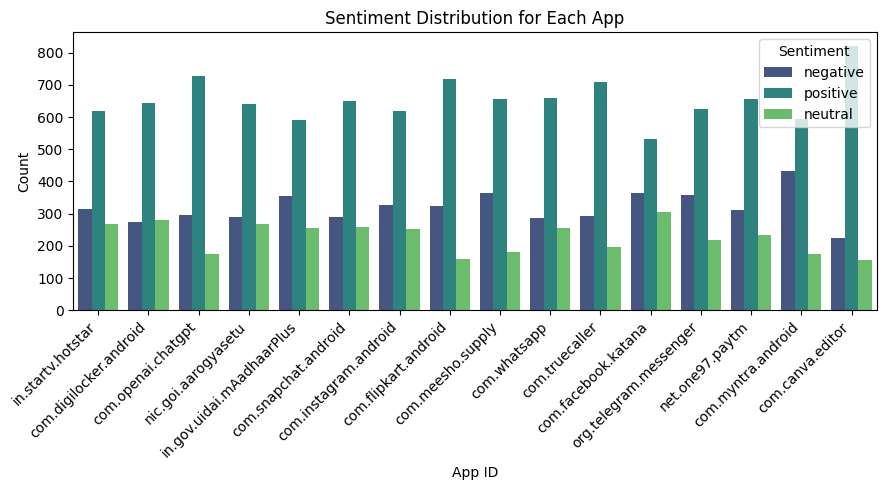

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download the NLTK VADER lexicon (Sentiment Intensity Analyzer)
nltk.download('vader_lexicon')

# Load your dataset (assuming you have the reviews dataset loaded into a DataFrame)
file_path = "/content/reviews - reviews.csv"
df = pd.read_csv(file_path)

# Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Apply the analyzer to each review in the dataset
df['compound'] = df['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment based on a threshold
threshold = 0.1
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x > threshold else 'negative' if x < -threshold else 'neutral')

# Visualize sentiment distribution for each app
plt.figure(figsize=(9, 5))
sns.countplot(x='appId', hue='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution for Each App')
plt.xlabel('App ID')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

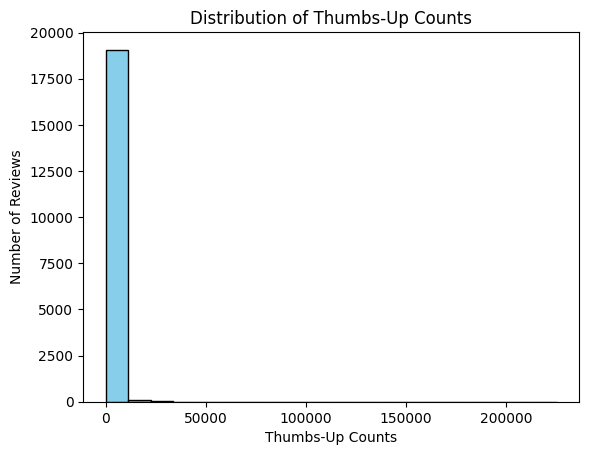

In [ ]:
import matplotlib.pyplot as plt

thumbs_up_counts = df['thumbsUpCount']

# Create a histogram
plt.hist(thumbs_up_counts, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Thumbs-Up Counts')
plt.xlabel('Thumbs-Up Counts')
plt.ylabel('Number of Reviews')
plt.show()

0        472
1        382
2        481
3        495
4        460
        ... 
19195     93
19196      8
19197     29
19198      4
19199     84
Name: content, Length: 19200, dtype: int64


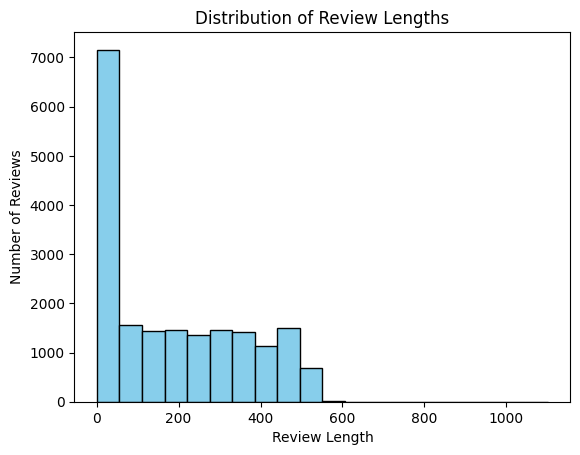

In [ ]:
import matplotlib.pyplot as plt

review_lengths = df['content'].apply(len)

# Create a histogram
plt.hist(review_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
# Assuming 'df' is your DataFrame containing the reviews data
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment_encoded'] = df['sentiment'].map(sentiment_mapping)
# Calculate Review Length
df['review_length'] = df['content'].apply(lambda x: len(str(x).split()))

# Assuming 'df' is your DataFrame containing the reviews data
correlation = df['review_length'].corr(df['sentiment_encoded'])
print(f"Correlation between review length and sentiment: {correlation}")

Correlation between review length and sentiment: -0.1270370830231777


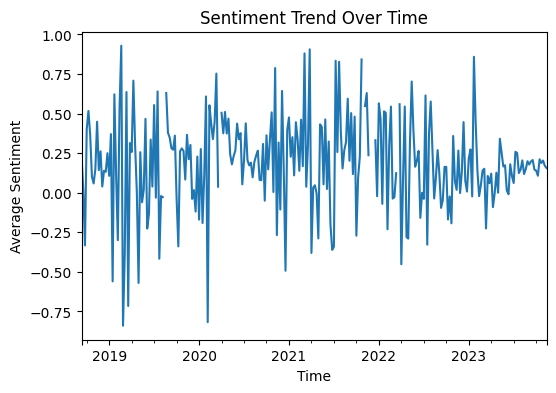

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

file_path = "/content/reviews - reviews.csv"
df = pd.read_csv(file_path)

# Convert 'at' to datetime format
df['at'] = pd.to_datetime(df['at'])

# Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Apply the analyzer to each review in the dataset
df['compound'] = df['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Set the timestamp column as the index for time series analysis
df.set_index('at', inplace=True)

# Resample the data to analyze sentiments over time (e.g., weekly)
resampled_sentiments = df['compound'].resample('W').mean()

# Plot the sentiment trend over time
plt.figure(figsize=(6, 4))
resampled_sentiments.plot(title='Sentiment Trend Over Time', ylabel='Average Sentiment', xlabel='Time')
plt.show()

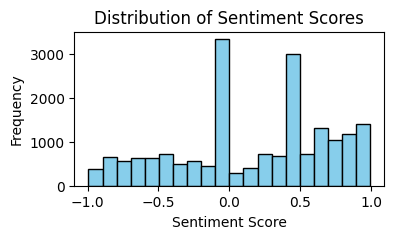

In [ ]:
# Plot the histogram of sentiment scores
plt.figure(figsize=(4, 2))
plt.hist(df['compound'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

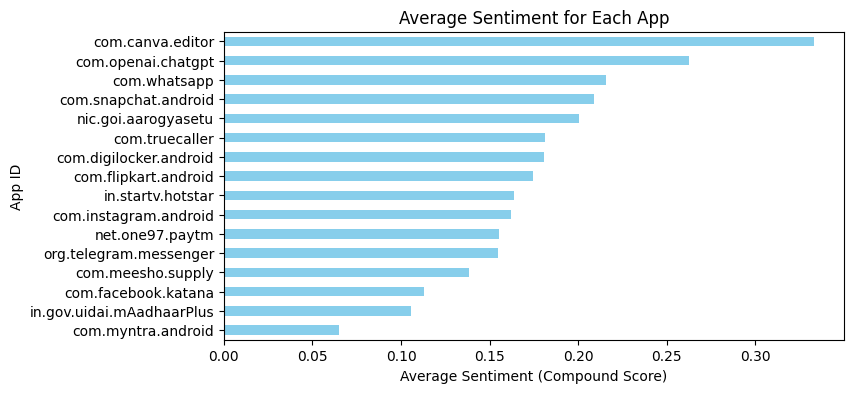

In [ ]:
app_sentiments = df.groupby('appId')['compound'].mean()
plt.figure(figsize=(8, 4))
app_sentiments.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Sentiment for Each App')
plt.xlabel('Average Sentiment (Compound Score)')
plt.ylabel('App ID')
plt.show()

In [ ]:
version_sentiments = df.groupby(['appId', 'reviewCreatedVersion'])['compound'].mean()
print(version_sentiments)

appId                   reviewCreatedVersion
com.canva.editor        1.10.2                  0.923000
                        1.9.0                   0.626700
                        2.1.2                   0.966000
                        2.101.0                -0.559400
                        2.109.0                 0.806800
                                                  ...   
org.telegram.messenger  9.7.1                  -0.786900
                        9.7.2                   0.687860
                        9.7.4                   0.046200
                        9.7.5                   0.449633
                        9.7.6                   0.417100
Name: compound, Length: 933, dtype: float64


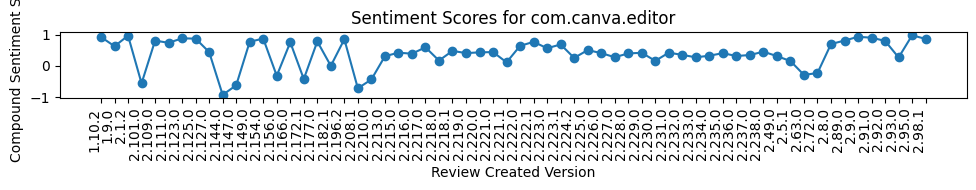

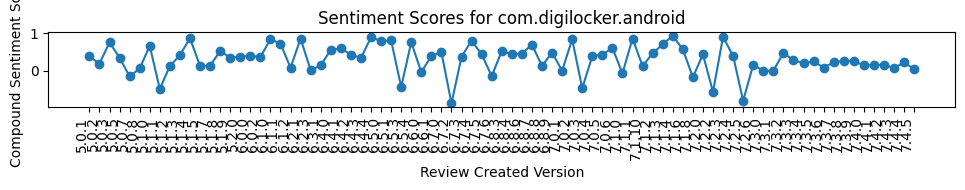

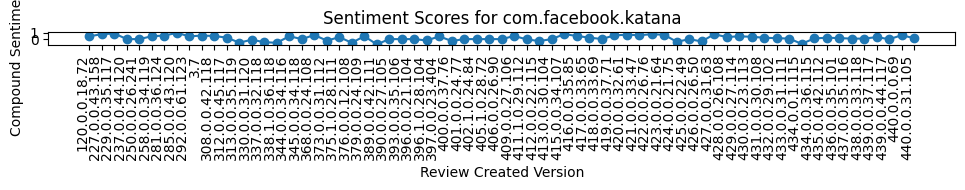

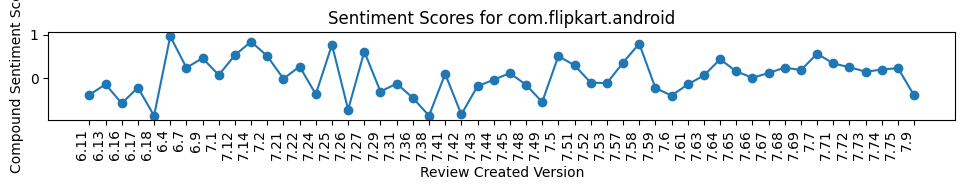

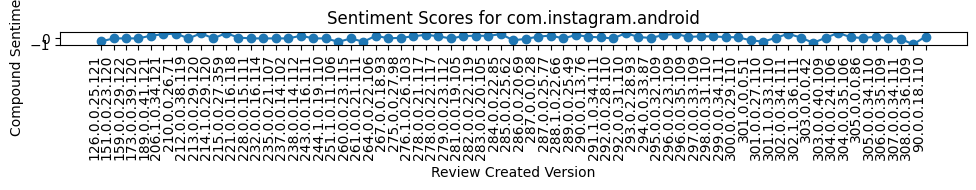

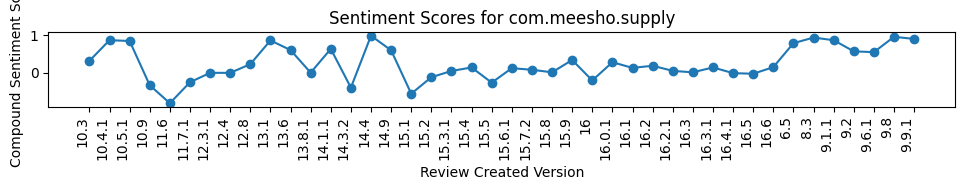

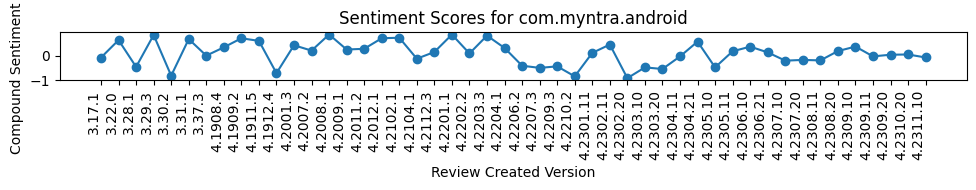

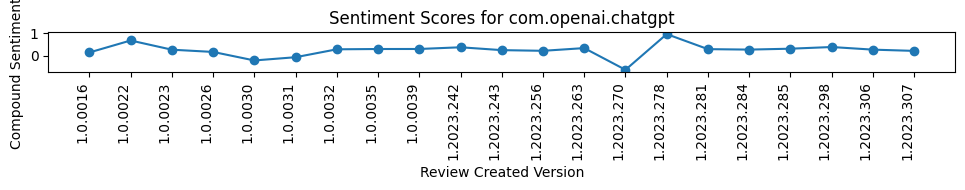

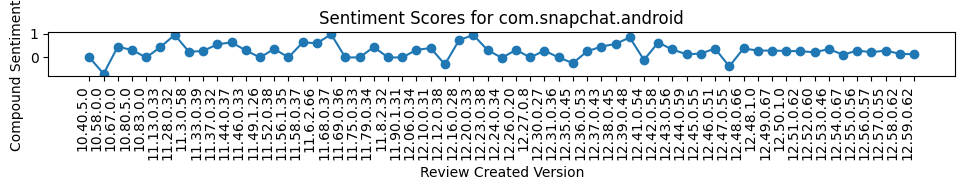

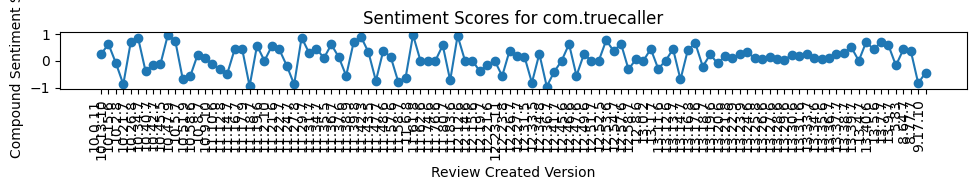

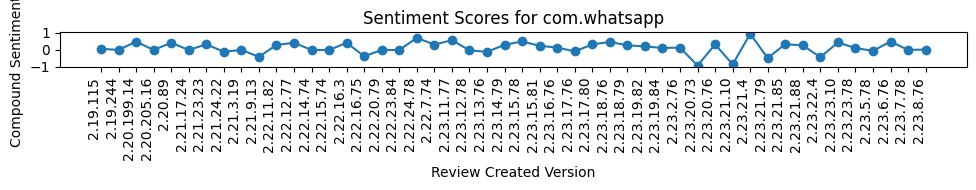

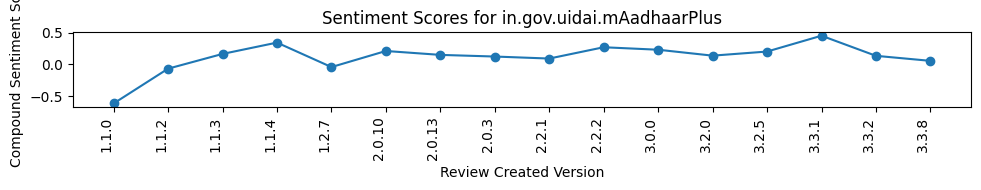

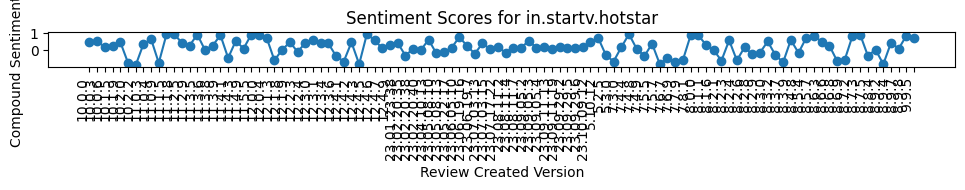

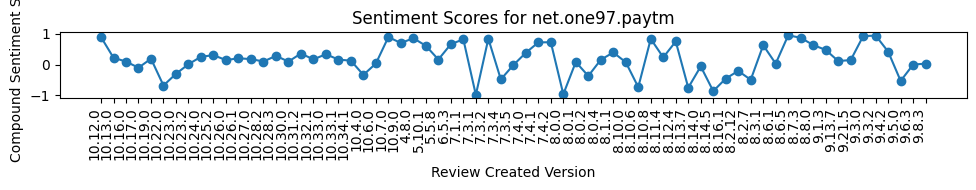

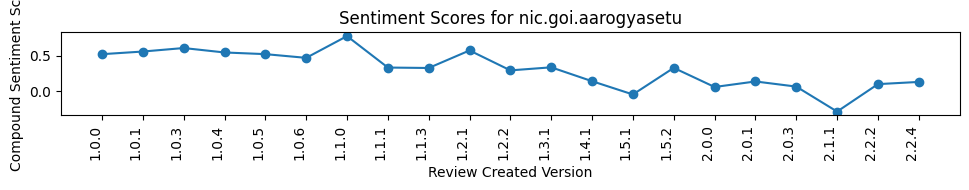

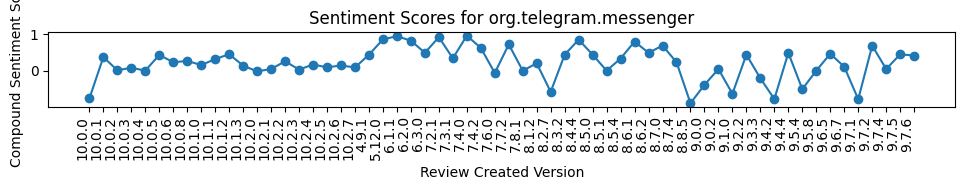

In [ ]:
import matplotlib.pyplot as plt

# Reset the index to convert the Series to DataFrame
df = version_sentiments.reset_index()

# Plot line charts for each app
unique_apps = df['appId'].unique()

for app_id in unique_apps:
    app_data = df[df['appId'] == app_id]

    # Plot the sentiment scores for each app and version using a line plot
    plt.figure(figsize=(10, 2))
    plt.plot(app_data['reviewCreatedVersion'], app_data['compound'], marker='o')

    plt.xlabel('Review Created Version')
    plt.ylabel('Compound Sentiment Score')
    plt.title(f'Sentiment Scores for {app_id}')
    plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

score
1   -0.178680
2    0.002377
3    0.158177
4    0.376849
5    0.538850
Name: compound, dtype: float64


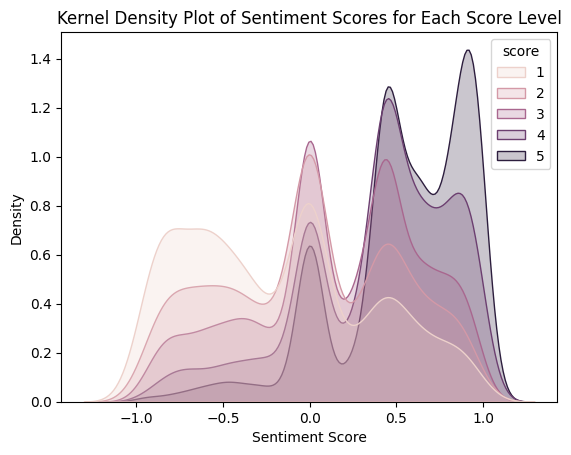

In [ ]:
score_sentiments = df.groupby('score')['compound'].mean()
print(score_sentiments)
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'compound' is the sentiment score column
sns.kdeplot(data=df, x='compound', hue='score', common_norm=False, fill=True)
plt.title('Kernel Density Plot of Sentiment Scores for Each Score Level')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()


In [ ]:
# Measuring central tendency

mean_sentiment = df['compound'].mean()
median_sentiment = df['compound'].median()
mode_sentiment = df['compound'].mode()
std_sentiment = df['compound'].std()

print(f"Mean Sentiment: {mean_sentiment}")
print(f"Median Sentiment: {median_sentiment}")
print(f"Mode Sentiment: {mode_sentiment}")
print(f"Standard Deviation Sentiment: {std_sentiment}")

Mean Sentiment: 0.175958296875
Median Sentiment: 0.2732
Mode Sentiment: 0    0.0
Name: compound, dtype: float64
Standard Deviation Sentiment: 0.5296110580274479


<ipython-input-71-5cc1d9335ac8>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sentiments, shade=True, color='skyblue')


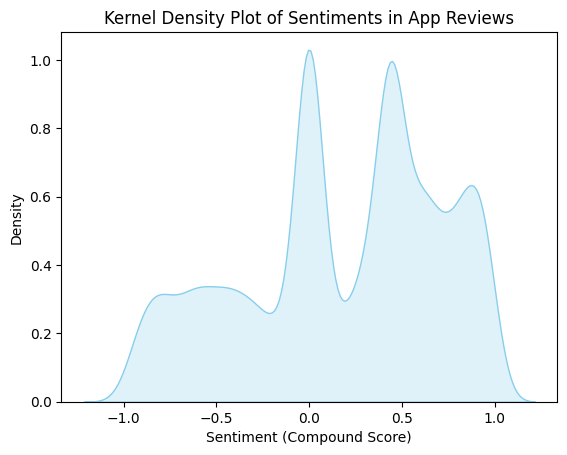

In [ ]:
sentiments = df['compound']

import seaborn as sns

# Kernel Density Plot
sns.kdeplot(sentiments, shade=True, color='skyblue')
plt.title('Kernel Density Plot of Sentiments in App Reviews')
plt.xlabel('Sentiment (Compound Score)')
plt.ylabel('Density')
plt.show()

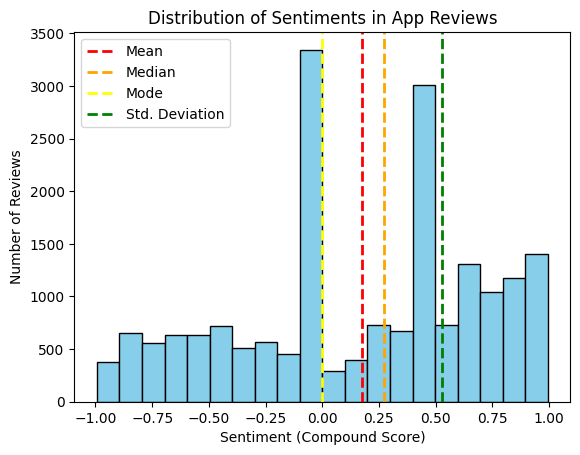

In [ ]:
import matplotlib.pyplot as plt
sentiments = df['compound']

# Create a histogram
plt.hist(sentiments, bins=20, color='skyblue', edgecolor='black')
plt.axvline(df['compound'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['compound'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
# Plot the mode as vertical lines for each value
for mode_value in df['compound'].mode():
    plt.axvline(mode_value, color='yellow', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(df['compound'].std(), color='green', linestyle='dashed', linewidth=2, label='Std. Deviation')
plt.title('Distribution of Sentiments in App Reviews')
plt.xlabel('Sentiment (Compound Score)')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


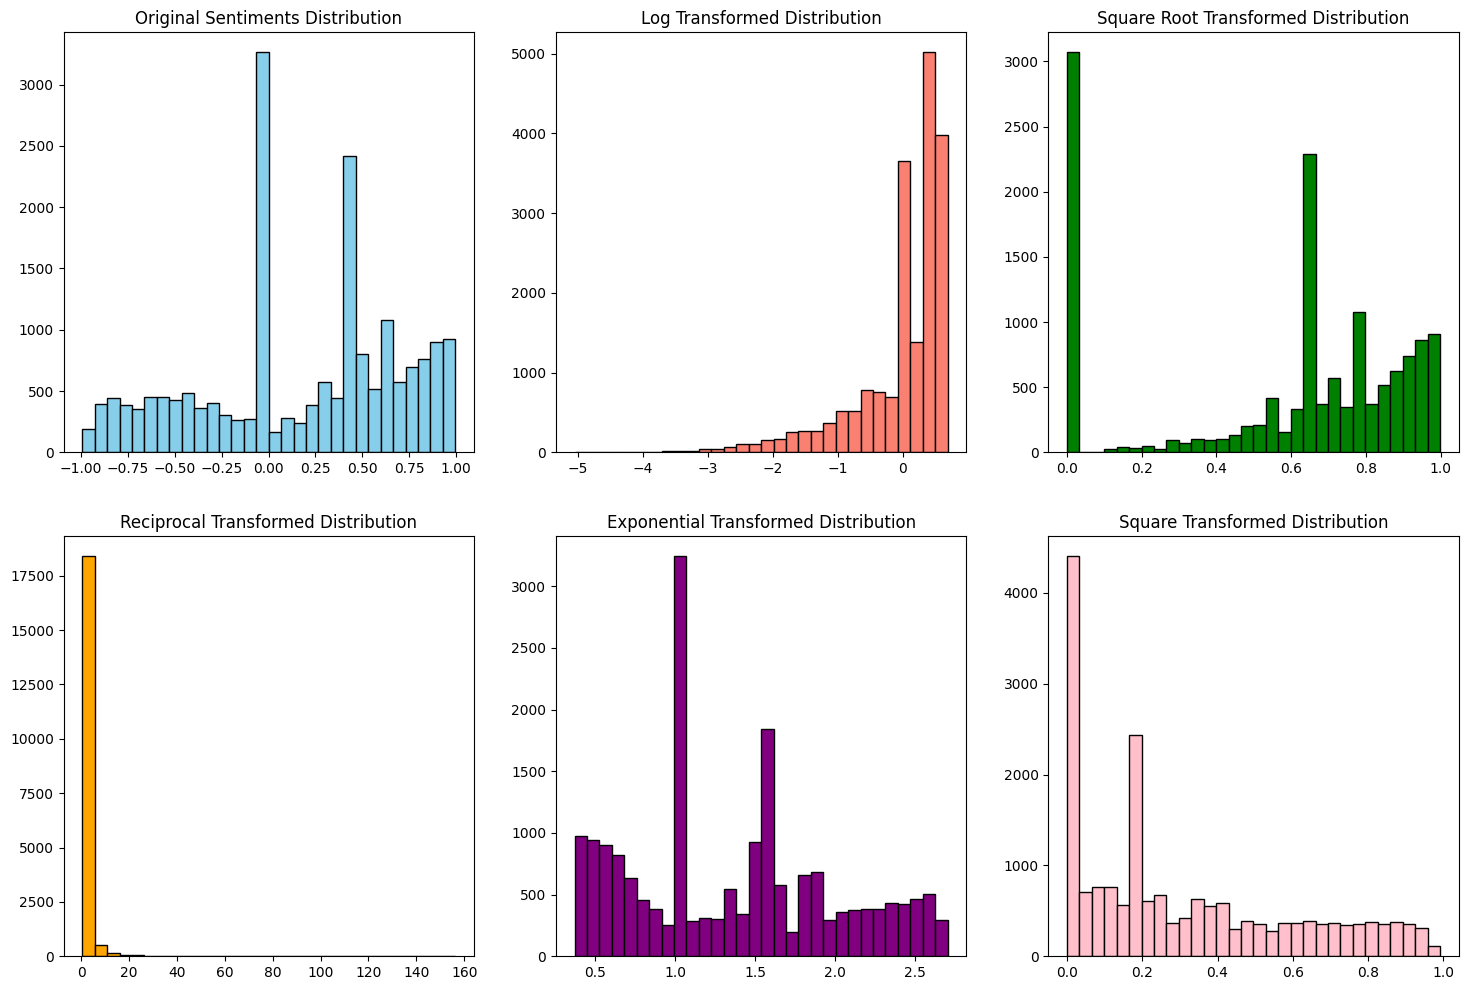

In [ ]:
from scipy.stats import boxcox
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'sentiments' is your DataFrame column
sentiments = df['compound']

# Apply log transformation
log_transformed_sentiments = np.log1p(sentiments)

# Apply square root transformation
sqrt_transformed_sentiments = np.sqrt(sentiments)

# Apply reciprocal transformation
reciprocal_transformed_sentiments = 1 / (sentiments + 1)  # Adding 1 to handle zero values

# Apply exponential transformation
exp_transformed_sentiments = np.exp(sentiments)

# Apply square transformation
square_transformed_sentiments = sentiments**2

# Apply Box-Cox transformation
transformed_sentiments, _ = boxcox(sentiments + 1)  # Adding 1 to handle zero values

# Plot the original and transformed distributions
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.hist(sentiments, bins=30, color='skyblue', edgecolor='black')
plt.title('Original Sentiments Distribution')

plt.subplot(2, 3, 2)
plt.hist(log_transformed_sentiments, bins=30, color='salmon', edgecolor='black')
plt.title('Log Transformed Distribution')

plt.subplot(2, 3, 3)
plt.hist(sqrt_transformed_sentiments, bins=30, color='green', edgecolor='black')
plt.title('Square Root Transformed Distribution')

plt.subplot(2, 3, 4)
plt.hist(reciprocal_transformed_sentiments, bins=30, color='orange', edgecolor='black')
plt.title('Reciprocal Transformed Distribution')

plt.subplot(2, 3, 5)
plt.hist(exp_transformed_sentiments, bins=30, color='purple', edgecolor='black')
plt.title('Exponential Transformed Distribution')

plt.subplot(2, 3, 6)
plt.hist(square_transformed_sentiments, bins=30, color='pink', edgecolor='black')
plt.title('Square Transformed Distribution')

plt.show()


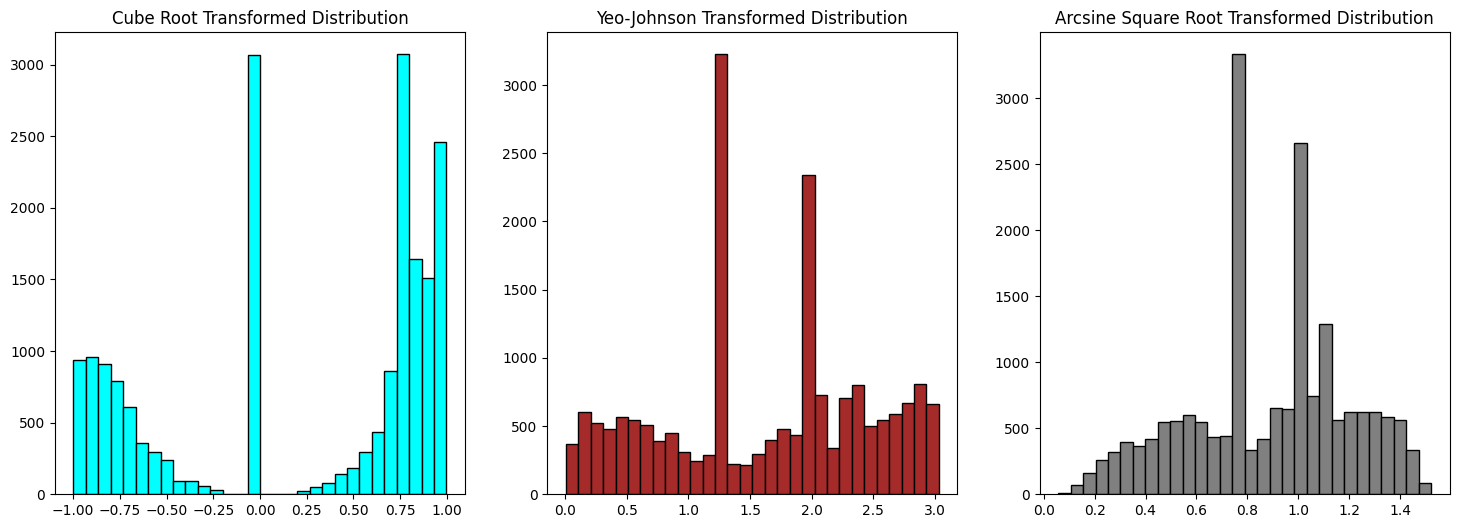

In [ ]:
from scipy.stats import yeojohnson

# Apply cube root transformation
cube_root_transformed_sentiments = np.cbrt(sentiments)

# Apply Yeo-Johnson transformation
yeojohnson_transformed_sentiments, _ = yeojohnson(sentiments + 1)  # Adding 1 to handle zero values

# Apply arcsine square root transformation (for percentages between 0 and 1)
arcsine_transformed_sentiments = np.arcsin(np.sqrt((sentiments + 1) / 2))

# Plot additional transformations
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(cube_root_transformed_sentiments, bins=30, color='cyan', edgecolor='black')
plt.title('Cube Root Transformed Distribution')

plt.subplot(1, 3, 2)
plt.hist(yeojohnson_transformed_sentiments, bins=30, color='brown', edgecolor='black')
plt.title('Yeo-Johnson Transformed Distribution')

plt.subplot(1, 3, 3)
plt.hist(arcsine_transformed_sentiments, bins=30, color='gray', edgecolor='black')
plt.title('Arcsine Square Root Transformed Distribution')

plt.show()


Optimization terminated successfully.
         Current function value: 0.666684
         Iterations 4


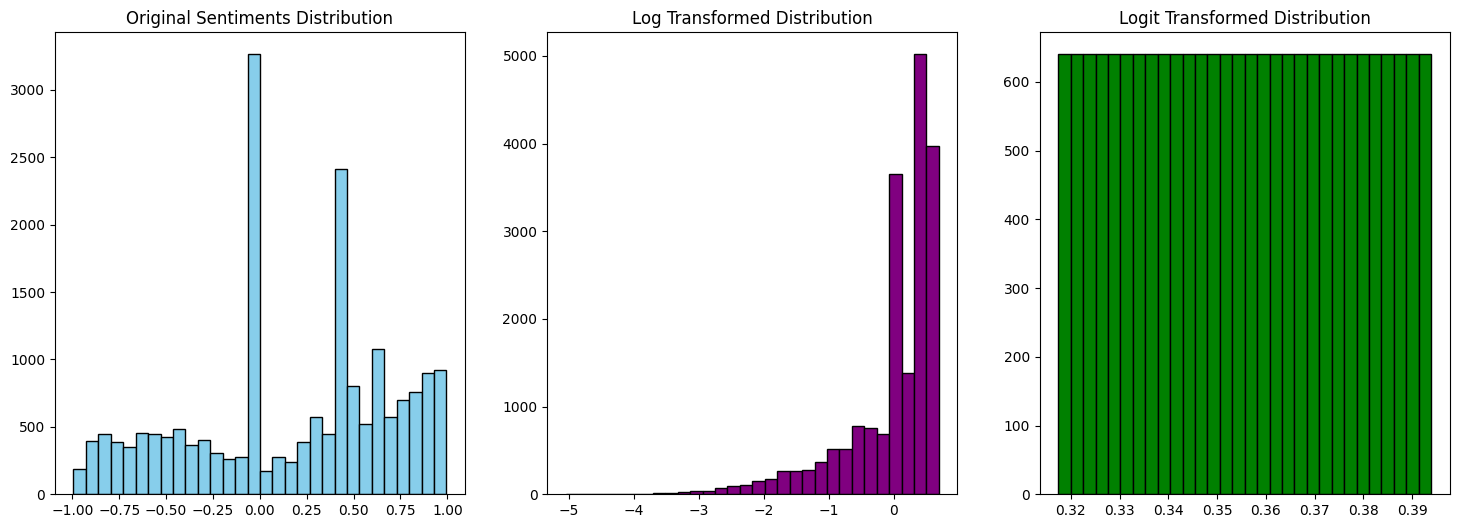

In [ ]:
from scipy.stats import boxcox
from statsmodels.tools.tools import add_constant
from statsmodels.discrete.discrete_model import Logit
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'sentiments' is your DataFrame column
transformed_sentiments, _ = boxcox(sentiments + 1)  # Adding 1 to handle zero values

# Apply logarithmic transformation
log_transformed_sentiments = np.log1p(sentiments)  # Using log1p to handle zero values

# Apply logit transformation (for values between 0 and 1)
logit_transformed_sentiments = Logit((sentiments + 1) / 2, add_constant(np.arange(len(sentiments)))).fit().fittedvalues

# Plot additional transformations
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(sentiments, bins=30, color='skyblue', edgecolor='black')
plt.title('Original Sentiments Distribution')

plt.subplot(1, 3, 2)
plt.hist(log_transformed_sentiments, bins=30, color='purple', edgecolor='black')
plt.title('Log Transformed Distribution')

plt.subplot(1, 3, 3)
plt.hist(logit_transformed_sentiments, bins=30, color='green', edgecolor='black')
plt.title('Logit Transformed Distribution')

plt.show()

Shapiro-Wilk Test Results:
Original: ShapiroResult(statistic=0.9489269256591797, pvalue=0.0)
Box-Cox: ShapiroResult(statistic=0.9514799118041992, pvalue=0.0)
Yeo-Johnson: ShapiroResult(statistic=0.9598172903060913, pvalue=0.0)
Log: ShapiroResult(statistic=0.7972303032875061, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


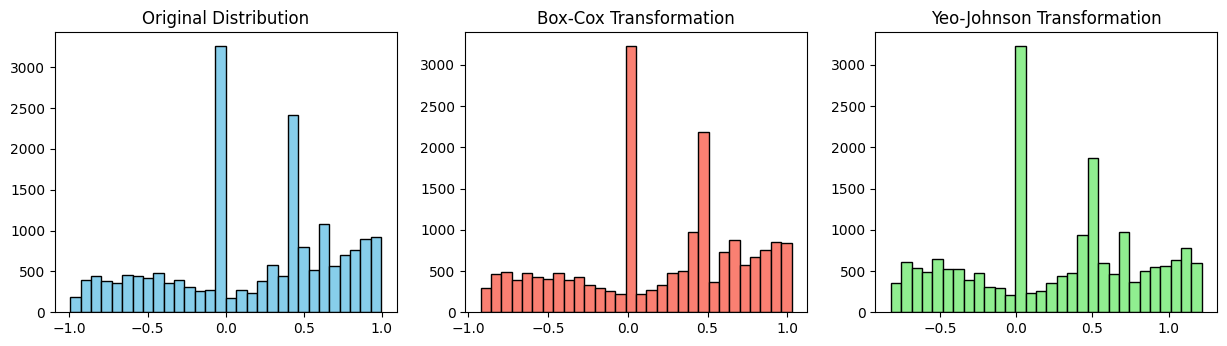

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox, yeojohnson
from scipy.stats import shapiro

sentiments = df['compound']

# Apply Box-Cox transformation
transformed_boxcox, _ = boxcox(sentiments + 1)  # Adding 1 to handle zero values

# Apply Yeo-Johnson transformation
transformed_yeojohnson, _ = yeojohnson(sentiments)

# Apply Log transformation
transformed_log = np.log1p(sentiments)  # Using log1p to handle zero values

# Visualize the original and transformed distributions
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.hist(sentiments, bins=30, color='skyblue', edgecolor='black')
plt.title('Original Distribution')

plt.subplot(2, 3, 2)
plt.hist(transformed_boxcox, bins=30, color='salmon', edgecolor='black')
plt.title('Box-Cox Transformation')

plt.subplot(2, 3, 3)
plt.hist(transformed_yeojohnson, bins=30, color='lightgreen', edgecolor='black')
plt.title('Yeo-Johnson Transformation')

# Perform Shapiro-Wilk test on each transformed distribution
print("Shapiro-Wilk Test Results:")
print("Original:", shapiro(sentiments))
print("Box-Cox:", shapiro(transformed_boxcox))
print("Yeo-Johnson:", shapiro(transformed_yeojohnson))
print("Log:", shapiro(transformed_log))

plt.show()


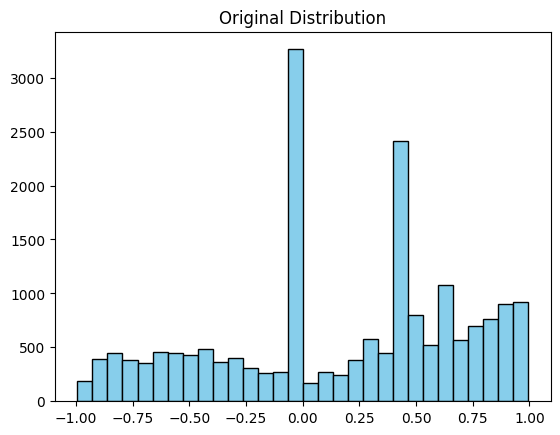

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


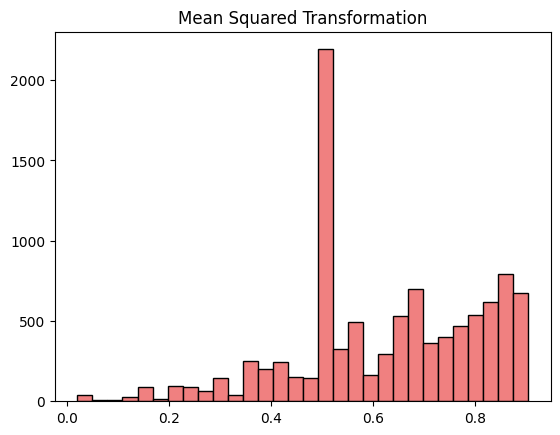

In [ ]:

plt.hist(sentiments, bins=30, color='skyblue', edgecolor='black')
plt.title('Original Distribution')
plt.show()
mean_centered_sentiments = sentiments - sentiments.mean()
plt.hist(np.sqrt(mean_centered_sentiments), bins=30, color='lightcoral', edgecolor='black')
plt.title('Mean Squared Transformation')
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


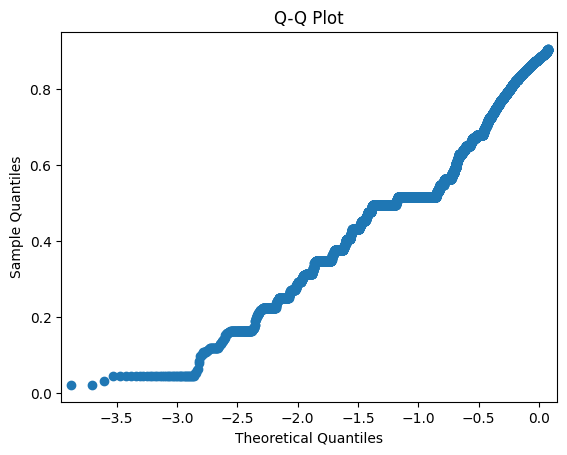

In [ ]:
import statsmodels.api as sm
# A straight line in the Q-Q plot indicates normality.
sm.qqplot(np.sqrt(mean_centered_sentiments), line='s')
plt.title('Q-Q Plot')
plt.show()

In [ ]:
from scipy.stats import shapiro

stat, p_value = shapiro(np.sqrt(mean_centered_sentiments))

if p_value > 0.05:
    print("Shapiro Wilk Result: Data appears to be normally distributed.")
else:
    print("Data does not appear to be normally distributed.")


Shapiro Wilk Result: Data appears to be normally distributed.


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
df['reviewCreatedVersion_numeric'] = df['reviewCreatedVersion'].apply(lambda x: pd.to_numeric('.'.join(str(x).split('.')[:2]), errors='coerce'))

# Calculate the correlation coefficient
correlation = df['reviewCreatedVersion_numeric'].corr(df['compound'])

print(f'Correlation Coefficient: {correlation:.2f}')


Correlation Coefficient: -0.04


Correlation coefficient between "score" and "compound": 0.44
Correlation coefficient between "thumbsUpCount" and "compound": 0.01


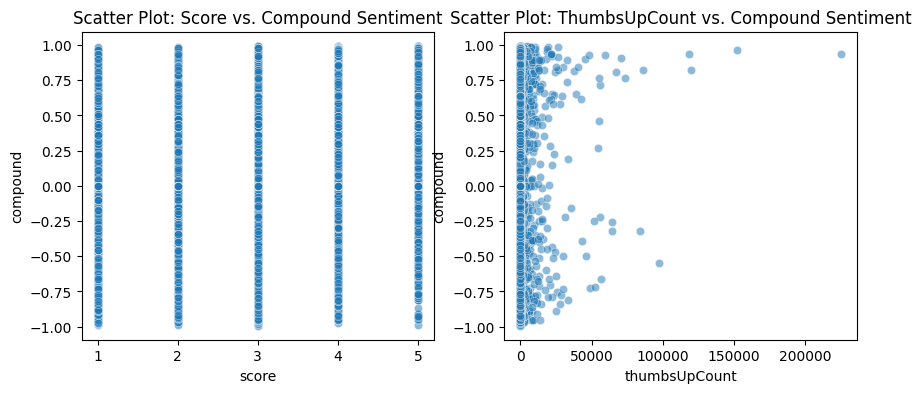

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation coefficients
correlation_score = df['score'].corr(df['compound'])
correlation_thumbs_up = df['thumbsUpCount'].corr(df['compound'])

print(f'Correlation coefficient between "score" and "compound": {correlation_score:.2f}')
print(f'Correlation coefficient between "thumbsUpCount" and "compound": {correlation_thumbs_up:.2f}')

# Create scatter plots
plt.figure(figsize=(10, 4))

# Scatter plot for 'score'
plt.subplot(1, 2, 1)
sns.scatterplot(x='score', y='compound', data=df, alpha=0.5)
plt.title('Scatter Plot: Score vs. Compound Sentiment')

# Scatter plot for 'thumbsUpCount'
plt.subplot(1, 2, 2)
sns.scatterplot(x='thumbsUpCount', y='compound', data=df, alpha=0.5)
plt.title('Scatter Plot: ThumbsUpCount vs. Compound Sentiment')

plt.show()


In [ ]:
import statsmodels.api as sm

X = df[['score', 'thumbsUpCount']]  # Independent variables
y = df['compound']  # Dependent variable

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     2327.
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:43:22   Log-Likelihood:                -12955.
No. Observations:               19200   AIC:                         2.592e+04
Df Residuals:                   19197   BIC:                         2.594e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3688      0.009    -42.439

In [ ]:
from statsmodels.stats.weightstats import ztest
import pandas as pd

threshold_score = 3  # Set your threshold for high and low scores

# Create two groups based on the 'score'
high_score_group = df[df['score'] >= threshold_score]['compound']
low_score_group = df[df['score'] < threshold_score]['compound']

# Perform a two-sample z-test
z_stat, p_value = ztest(high_score_group, low_score_group)

# Print the results
print(f'Z-statistic: {z_stat:.4f}')
print(f'P-value: {p_value:.4f}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")


Z-statistic: 52.2140
P-value: 0.0000
Reject the null hypothesis: There is a significant difference between the means.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Assuming 'df' is your DataFrame containing the 'score' and 'compound' columns
threshold = 4

# Create two groups based on the threshold
high_score_group = df[df['score'] > threshold]['compound']
low_score_group = df[df['score'] <= threshold]['compound']

# Calculate sample means and standard deviations
mean_high = high_score_group.mean()
print(f"Sample mean 1: {mean_high}")
mean_low = low_score_group.mean()
print(f"Sample mean 2: {mean_low}")
std_high = high_score_group.std()
print(f"Sample SD 1: {std_high}")
std_low = low_score_group.std()
print(f"Sample SD 2: {std_low}")

# Calculate sample sizes
n_high = len(high_score_group)
print(f"Sample size 1: {n_high}")
n_low = len(low_score_group)
print(f"Sample size 2: {n_low}")
# Calculate the standard error of the difference between means
se_diff = np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))

# Calculate the z-statistic
z_statistic = (mean_high - mean_low) / se_diff

# Determine critical values for a two-tailed test at a 5% significance level
critical_value = norm.ppf(1 - 0.05)

# Make a decision based on the z-statistic and critical value
if abs(z_statistic) > critical_value:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

# Print the results
print(f"Z-statistic: {z_statistic:.4f}")


Sample mean 1: 0.5388495625
Sample mean 2: 0.10338004375
Sample SD 1: 0.38269934822035717
Sample SD 2: 0.5250684968616217
Sample size 1: 3200
Sample size 2: 16000
Reject the null hypothesis: There is a significant difference between the means.
Z-statistic: 54.8643


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Assuming 'df' is your DataFrame containing the 'score' and 'compound' columns
threshold = 3

# Create two groups based on the threshold
high_score_group = df[df['score'] > threshold]['compound']
low_score_group = df[df['score'] <= threshold]['compound']

# Reduce sample size for each group
new_sample_size = 200

high_score_group = high_score_group.sample(n=new_sample_size, random_state=42)
low_score_group = low_score_group.sample(n=new_sample_size, random_state=42)

# Calculate sample means and standard deviations
# Calculate sample means and standard deviations
mean_high = high_score_group.mean()
print(f"Sample mean 1: {mean_high}")
mean_low = low_score_group.mean()
print(f"Sample mean 2: {mean_low}")
std_high = high_score_group.std()
print(f"Sample SD 1: {std_high}")
std_low = low_score_group.std()
print(f"Sample SD 2: {std_low}")

# Calculate sample sizes
n_high = len(high_score_group)
print(f"Sample size 1: {n_high}")
n_low = len(low_score_group)
print(f"Sample size 2: {n_low}")

# Calculate the standard error of the difference between means
se_diff = np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))

# Calculate the z-statistic
z_statistic = (mean_high - mean_low) / se_diff

# Determine critical values for a two-tailed test at a 5% significance level
critical_value = norm.ppf(1 - 0.025)  # Dividing alpha by 2 for a two-tailed test

# Make a decision based on the z-statistic and critical value
if abs(z_statistic) > critical_value:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

# Print the results
print(f"Z-statistic: {z_statistic:.4f}")


Sample mean 1: 0.483752
Sample mean 2: 0.05517849999999999
Sample SD 1: 0.42545882781631666
Sample SD 2: 0.5072004347323783
Sample size 1: 200
Sample size 2: 200
Reject the null hypothesis: There is a significant difference between the means.
Z-statistic: 9.1553


In [ ]:
from scipy.stats import ttest_rel

# Assuming 'df' is your DataFrame
# Create a DataFrame with high and low scores for each user
high_score_group = df[df['score'] >= 4]['compound']
low_score_group = df[df['score'] < 4]['compound']

# Ensure that the lengths of both groups are the same
min_length = min(len(high_score_group), len(low_score_group))
high_score_group = high_score_group[:min_length]
low_score_group = low_score_group[:min_length]

# Perform the paired t-test
t_statistic, p_value = ttest_rel(high_score_group, low_score_group)

# Print the results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in mean 'compound' scores.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean 'compound' scores.")

T-Statistic: 50.0789
P-Value: 0.0000
Reject the null hypothesis: There is a significant difference in mean 'compound' scores.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19200 entries, 0 to 19199
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              19200 non-null  object 
 1   userName              19200 non-null  object 
 2   userImage             19200 non-null  object 
 3   content               19200 non-null  object 
 4   score                 19200 non-null  int64  
 5   thumbsUpCount         19200 non-null  int64  
 6   reviewCreatedVersion  17055 non-null  object 
 7   at                    19200 non-null  object 
 8   replyContent          6308 non-null   object 
 9   repliedAt             6308 non-null   object 
 10  appVersion            17055 non-null  object 
 11  sortOrder             19200 non-null  object 
 12  appId                 19200 non-null  object 
 13  compound              19200 non-null  float64
 14  sentiment             19200 non-null  object 
dtypes: float64(1), int6

In [ ]:
bins = [0, 2, 4, 6]  # Adjust the bin edges based on your 'score' values
labels = ['Low', 'Medium', 'High']
df['group'] = pd.cut(df['score'], bins=bins, labels=labels)

print(df['score'].unique())

[1 2 3 4 5]


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming 'df' is your DataFrame
grouped_data = []

# Iterate over unique values in the 'group' column
for group_name in df['group'].unique():
    # Extract the 'compound' values for each group
    group_data = df[df['group'] == group_name]['compound']
    grouped_data.append(group_data)

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print the results
print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between group means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between group means.")

F-Statistic: 1918.3562
P-Value: 0.0000
Reject the null hypothesis: There is a significant difference between group means.


Cross-Validation Scores: [0.19285083 0.17565802 0.17818291 0.15503659 0.23626252]


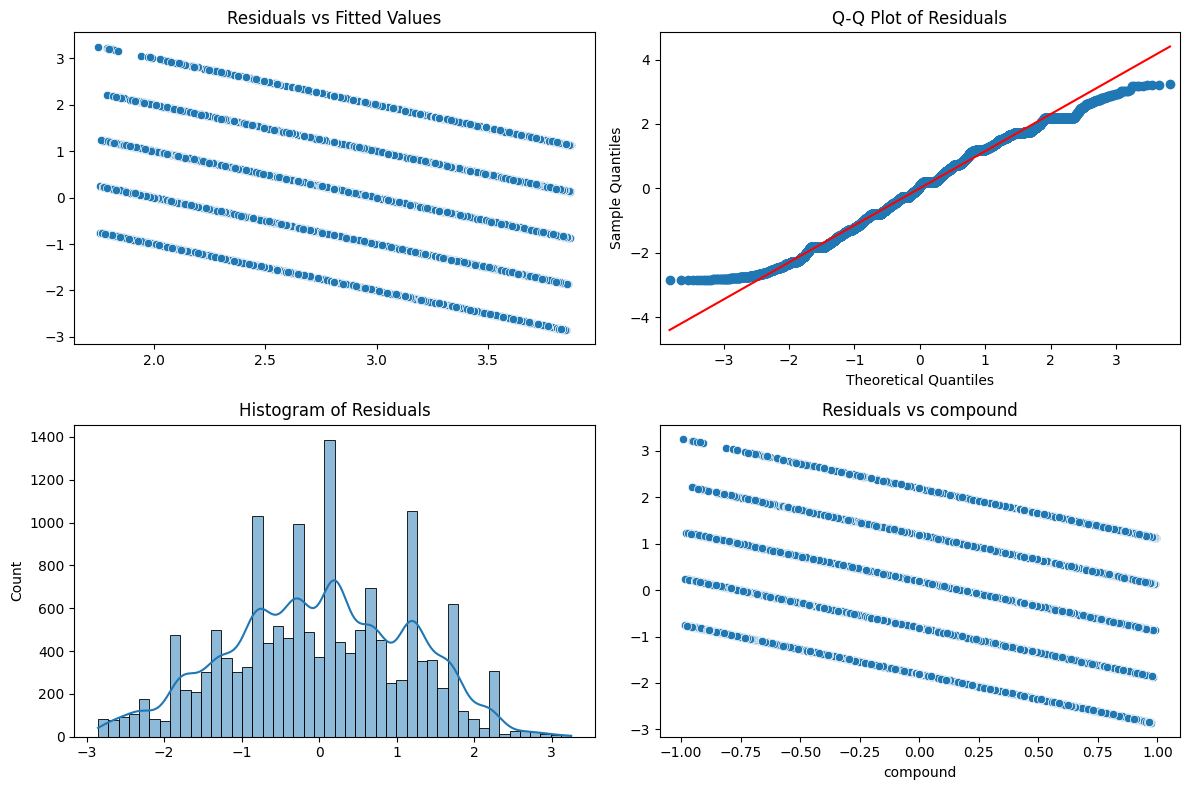

RMSE on Test Set: 1.1723
R-squared on Test Set: 0.1996
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     3679.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:18:36   Log-Likelihood:                -24011.
No. Observations:               15360   AIC:                         4.803e+04
Df Residuals:                   15358   BIC:                         4.804e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

# Assuming 'df' is your DataFrame with 'score' and 'compound' columns
# Add a constant term for the intercept
df['const'] = 1

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['const', 'compound']], df['score'], test_size=0.2, random_state=42)

# Fit the linear regression model on the training set
model = sm.OLS(y_train, X_train)
results = model.fit()

# Cross-validation
cv_scores = cross_val_score(LinearRegression(), df[['compound']], df['score'], cv=5)
print("Cross-Validation Scores:", cv_scores)

# Residual Analysis
residuals = y_train - results.predict(X_train)

# Diagnostic Plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.scatterplot(x=results.predict(X_train), y=residuals, ax=axes[0, 0])
axes[0, 0].set_title('Residuals vs Fitted Values')
sm.qqplot(residuals, line='r', ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Residuals')
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Residuals')
sns.scatterplot(x=df['compound'], y=residuals, ax=axes[1, 1])
axes[1, 1].set_title('Residuals vs compound')
plt.tight_layout()
plt.show()

# Performance Metrics on Test Set
y_pred_test = results.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r_squared = r2_score(y_test, y_pred_test)

print(f"RMSE on Test Set: {rmse:.4f}")
print(f"R-squared on Test Set: {r_squared:.4f}")

# Summary of Regression
print(results.summary())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Assume 'content' is the text column and 'score' is the target variable
X = df[['content', 'score', 'thumbsUpCount', 'appId']]
y = df['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Text Preprocessing (CountVectorizer)
text_preprocessor = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
])
X_train_text_transformed = text_preprocessor.fit_transform(X_train['content'])

# 2. Numerical Preprocessing (Imputation and Scaling)
numerical_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])
X_train_numerical_transformed = numerical_preprocessor.fit_transform(X_train[['score', 'thumbsUpCount']])

# 3. Categorical Preprocessing (One-Hot Encoding)
categorical_preprocessor = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])
X_train_categorical_transformed = categorical_preprocessor.fit_transform(X_train[['appId']])

# 4. Column Transformation (Combining Features)
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_preprocessor, 'content'),
        ('numerical', numerical_preprocessor, ['score', 'thumbsUpCount']),
        ('categorical', categorical_preprocessor, ['appId']),
    ],
    remainder='passthrough'  # Pass through columns not specified
)
X_train_transformed = preprocessor.fit_transform(X_train)

# Create a pipeline with preprocessing and the model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42)),
])

# Print the original data
print("Original data:")
print(X_train.head())

# Fit the model
model.fit(X_train, y_train)

# Transform the data using the preprocessor
X_train_transformed = preprocessor.transform(X_train)

# Print the transformed data
print("\nTransformed data:")
print(X_train_transformed)

# Models for evaluation
models = {
    'K-Neighbors Classifier': KNeighborsClassifier(n_neighbors=3),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'SVC': SVC(),
    'Logistic Regression': LogisticRegression(),
}

# Evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_transformed, y_train)

    # Transform the test data
    X_test_transformed = preprocessor.transform(X_test)

    # Make predictions
    y_pred = model.predict(X_test_transformed)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)

    # Print the accuracy
    print(f'\n{model_name} Accuracy: {accuracy:.2f}')


Original data:
                                                 content  score  \
12477  Everything is fine but there should be one imp...      3   
3781   I cannot access my certificate nor can I check...      1   
30     I don't know why we are paying for the subscri...      1   
1604   My profile is got sign out automatically in 3-...      3   
10027  There is a bug in app, when you scroll down in...      3   

       thumbsUpCount                   appId  
12477              2          com.truecaller  
3781               0     nic.goi.aarogyasetu  
30              1829       in.startv.hotstar  
1604               0  com.digilocker.android  
10027              5       com.meesho.supply  

Transformed data:
  (0, 796)	1.0
  (0, 3682)	1.0
  (0, 3926)	1.0
  (0, 5217)	1.0
  (0, 5317)	1.0
  (0, 6691)	1.0
  (0, 10771)	1.0
  (0, 11875)	1.0
  (0, 15776)	0.002075451028685297
  (0, 15777)	-0.09450201455682236
  (0, 15787)	1.0
  (1, 702)	1.0
  (1, 2539)	2.0
  (1, 2642)	1.0
  (1, 9153)	1.0
  (1

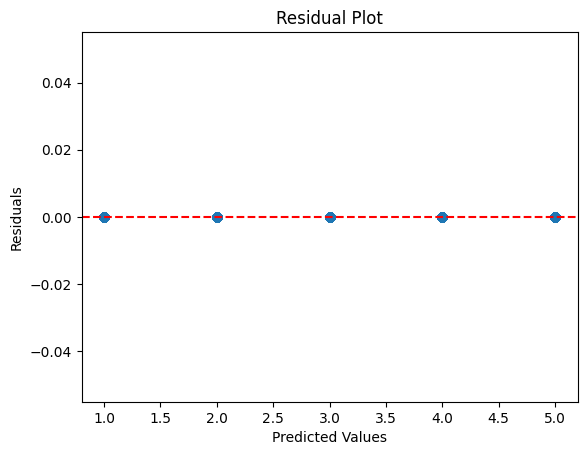

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'model' is your linear regression model
residuals = y_test - model.predict(X_test_transformed)
plt.scatter(model.predict(X_test_transformed), residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()


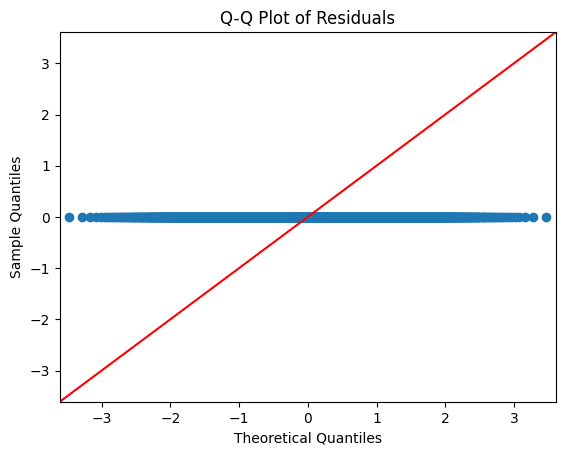

In [ ]:
import statsmodels.api as sm

# Assuming 'model' is your linear regression model
residuals = y_test - model.predict(X_test_transformed)
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

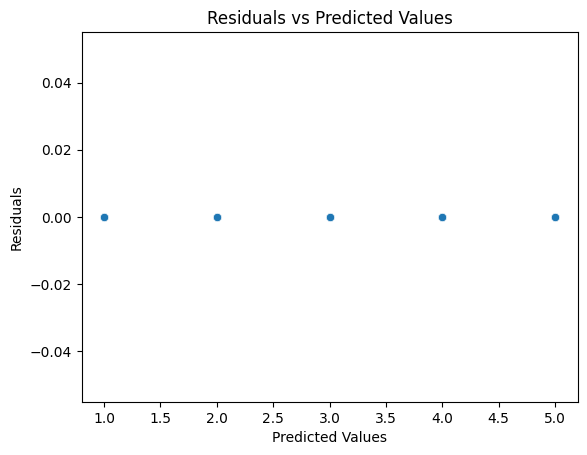

In [ ]:
import seaborn as sns

# Assuming 'model' is your linear regression model
residuals = y_test - model.predict(X_test_transformed)
sns.scatterplot(x=model.predict(X_test_transformed), y=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


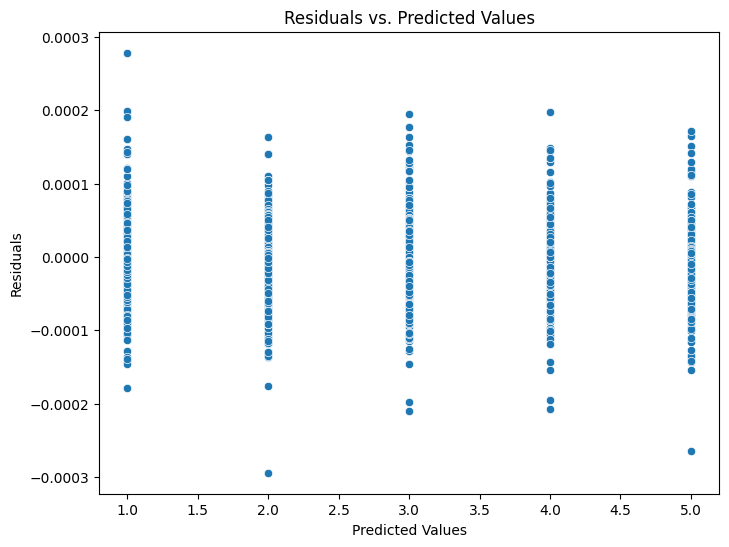

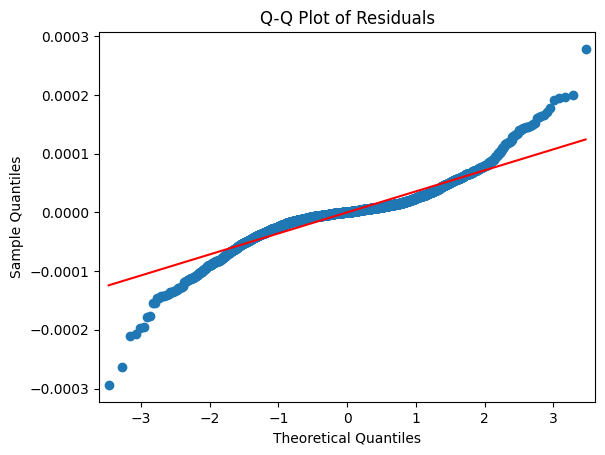

In [ ]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Create a linear regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test_transformed)

# Residual analysis
residuals = y_test - y_pred_linear

# Scatter plot of predicted vs. residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_linear, y=residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Q-Q plot of residuals
import statsmodels.api as sm
sm.qqplot(residuals, line='r')
plt.title('Q-Q Plot of Residuals')
plt.show()


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Download the NLTK VADER lexicon (Sentiment Intensity Analyzer)
nltk.download('vader_lexicon')

# Load your dataset
file_path = "/content/reviews - reviews.csv"
df = pd.read_csv(file_path)

# Display the original dataset
print("Original Dataset:")
print(df.head())

# Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Apply the analyzer to each review in the dataset
df['compound'] = df['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# You can use a threshold to classify the sentiment as positive, negative, or neutral
threshold = 0.1
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x > threshold else 'negative' if x < -threshold else 'neutral')

# Display the results
print("\nProcessed Dataset:")
print(df[['content', 'compound', 'sentiment']])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Original Dataset:
                               reviewId          userName  \
0  aacc23bf-d882-4893-9ccd-f0a7c7a970d6       Rahul Yadav   
1  e9b116bc-42e0-40d3-b8e7-19ccc98e83a4     Snifa D'souza   
2  bf6690f7-502b-41dc-a4c4-79c0ebb97ff3  Dipankar Rakshit   
3  91ffb12a-80b5-4a3e-abc4-e20f799321b4       Gaurav Sahu   
4  ea74c9a1-a3d5-41ab-90fc-317b9940346f       Rohit Menon   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0  This app is so frustrating, especially for use...      1          22274   
1  Worst app ever. With a paid subscription, I'm ...      1          11910   
2  It has become very difficult for us visua

In [ ]:
import statsmodels.api as sm

# Assuming 'X' is your matrix of independent variables and 'y' is the dependent variable
# In this example, we use 'score' as the dependent variable and 'compound' as an independent variable
X = sm.add_constant(df[['compound']])
y = df['score']

# Fit the linear model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     4638.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:38:12   Log-Likelihood:                -30070.
No. Observations:               19200   AIC:                         6.014e+04
Df Residuals:                   19198   BIC:                         6.016e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8108      0.009    318.994      0.0

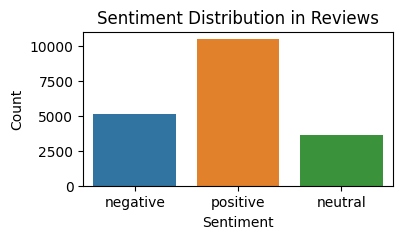

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(4, 2))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

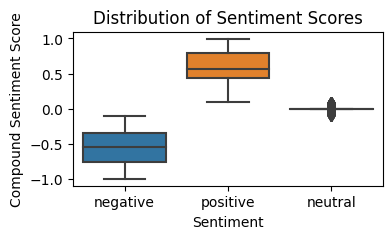

In [ ]:
plt.figure(figsize=(4, 2))
sns.boxplot(x='sentiment', y='compound', data=df)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Compound Sentiment Score')
plt.show()


In [ ]:
!pip install wordcloud

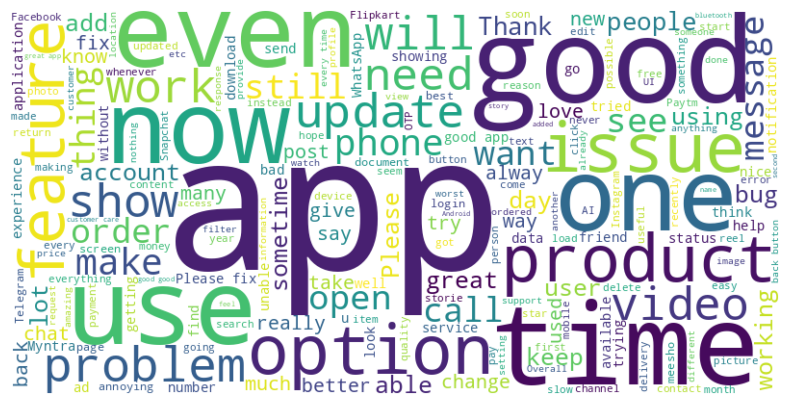

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a 'content' column containing the reviews
text = ' '.join(df['content'].astype(str).values)

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text)

# Display the generated wordcloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()